In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


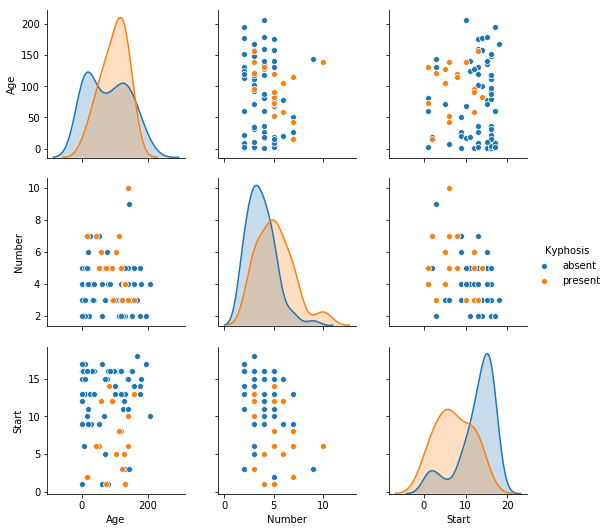

In [5]:
sns.pairplot(df,hue='Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x =df.drop('Kyphosis',axis=1)

In [8]:
y = df['Kyphosis']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier(criterion ='entropy')

In [12]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
prediction = dtree.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [15]:
conf_matrix = confusion_matrix(y_test,prediction)

In [16]:
accu =accuracy_score(y_test,prediction)

In [17]:
accu

0.76

In [18]:
conf_matrix

array([[18,  3],
       [ 3,  1]], dtype=int64)

In [19]:
from IPython.display import Image

In [22]:
from sklearn.externals.six import StringIO

In [23]:
from sklearn.tree import export_graphviz
import pydot


In [24]:
features = list(df.columns[1:])

In [25]:
features

['Age', 'Number', 'Start']

In [26]:
dot_data = StringIO()

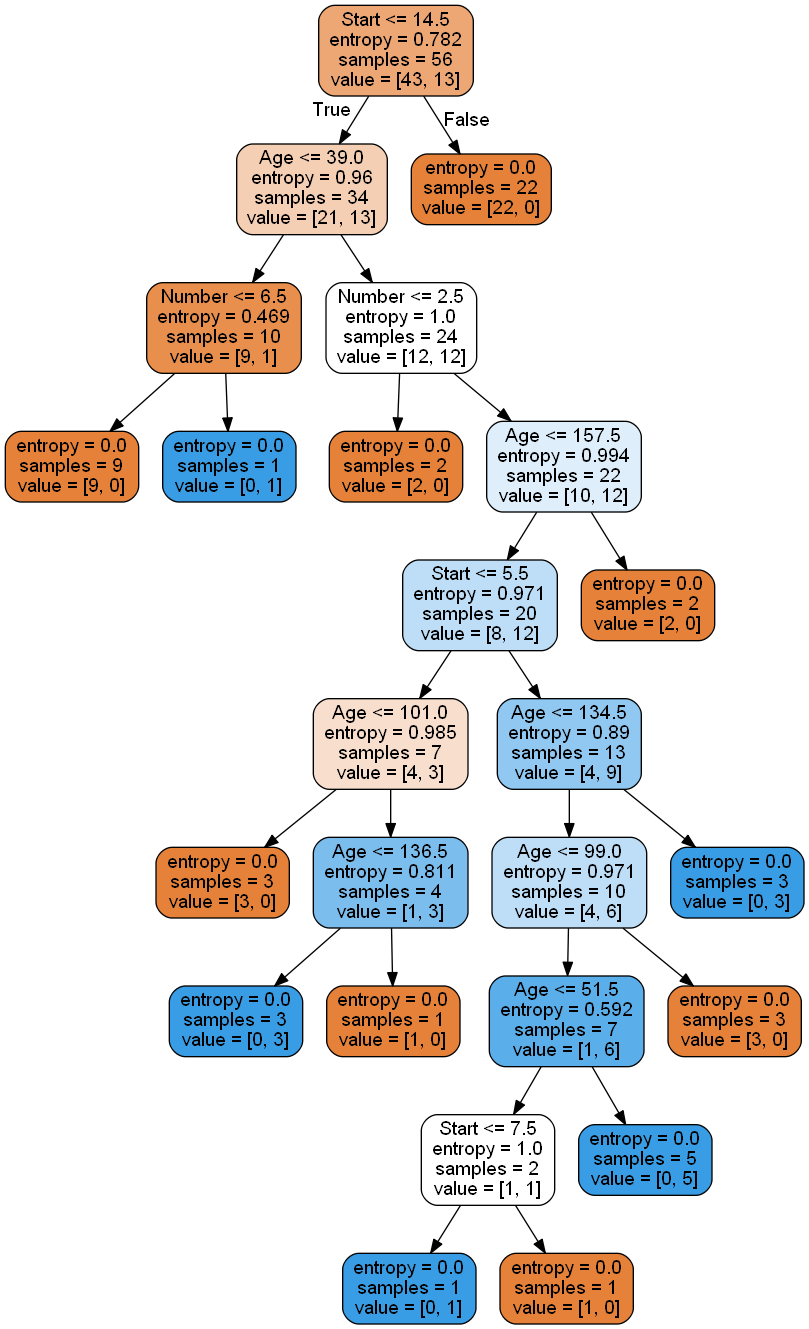

In [30]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
rfc = RandomForestClassifier(n_estimators=100)

In [35]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
rfc_pred = rfc.predict(x_test)

In [38]:
print(confusion_matrix(y_test,rfc_pred))

[[19  2]
 [ 1  3]]


In [44]:
print(classification_report(y_test,rfc_pred))
accuracy_score(y_test,rfc_pred)

              precision    recall  f1-score   support

      absent       0.95      0.90      0.93        21
     present       0.60      0.75      0.67         4

   micro avg       0.88      0.88      0.88        25
   macro avg       0.77      0.83      0.80        25
weighted avg       0.89      0.88      0.89        25



0.88